In [412]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [413]:
# define the path where the data is persisted
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

In [463]:
# load some stock data
value_stock = pd.read_feather(STORAGE_PATH.format("IBM_normalized"))
growth_stock = pd.read_feather(STORAGE_PATH.format("AAPL_normalized"))

In [464]:
# define the crossing strategy
def regulating_speculator(stock, indicators, min_position, max_position):
    size = stock.shape[0]
    # this strategy is absed on the bollinger position
    # a high position of the price within the bollinger bands results in the reduction of the position in the stock
    warnings.simplefilter("ignore", category=RuntimeWarning)
    mean_features = np.nanmean(stock[indicators], axis=1)
    rule = np.where(np.isnan(mean_features), 0, mean_features)
    position = np.clip(1 - rule[:size - 1], min_position , max_position)
    # calculate the price changes considering the chosen position
    price_changes = np.diff(stock["current_price"]) / stock["current_price"][:size - 1]
    position_changes = position * price_changes

    # update the value of the portfolio iteratively
    position_total = np.zeros(size) + stock["current_price"][0]
    for index in range(size - 1):
        position_total[index + 1] = position_total[index]  * (1 + position_changes[index])
    
    return position, position_total


In [465]:
def plot_performance(strategies):
    plt.figure(figsize=(15,8))
    for name, performance in strategies.items():
        plt.plot(np.arange(len(performance)), performance, label=name)
    
    plt.title("Performance comparison of multiple portfolio strategies")
    plt.legend()
    plt.xlabel("Trading days")
    plt.ylabel("Price/Portfolio value")
    plt.show()

0.7050578934301946


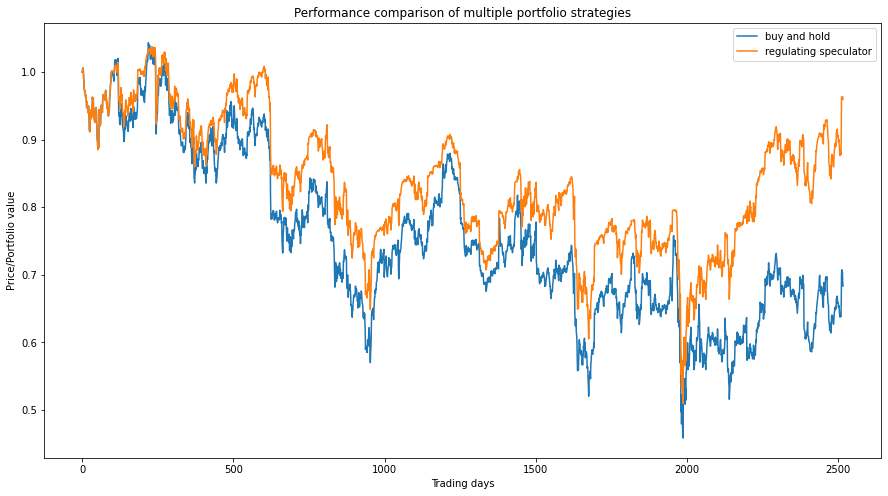

In [466]:
# compare the buy and hold to the bollinger band strategy
indicators = ["bollinger_position50_2", "horizontal_position100", "regression_position100"]
strategy_speculator, strategy_performance_speculator = regulating_speculator(value_stock, indicators, 0, 1)
print(strategy.mean())

performances = {
    "buy and hold": value_stock["current_price"],
    "regulating speculator": strategy_performance_speculator
}

plot_performance(performances)

0.7050578934301946


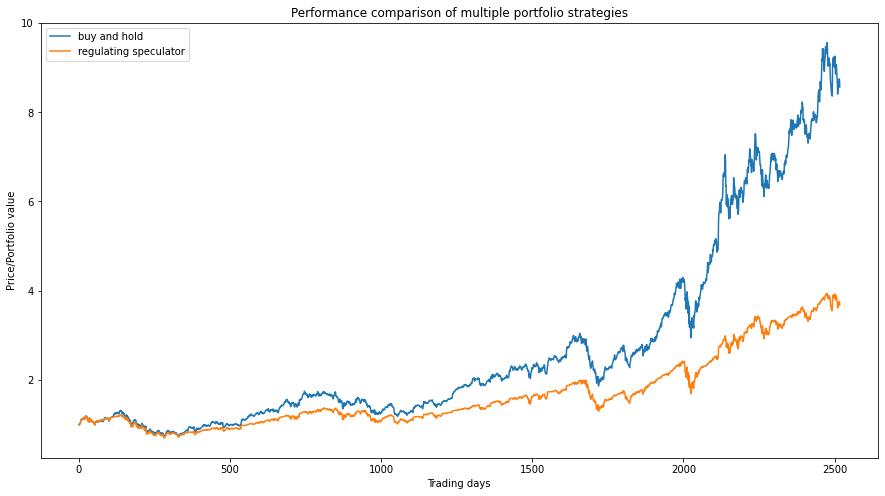

In [467]:
# compare the buy and hold to the bollinger band strategy
indicators = ["bollinger_position50_2", "bollinger_position20_2", "horizontal_position100", "regression_position100"]
strategy, strategy_performance = regulating_speculator(growth_stock, indicators, 0, 1)
print(strategy.mean())

performances = {
    "buy and hold": growth_stock["current_price"],
    "regulating speculator": strategy_performance
}

plot_performance(performances)